In [1]:
!pip install pandas


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## 1) Import and Concatenate
### a) Import and Convert to Structured Format

In [3]:
import pandas as pd

# Load datasets
df_bangalore = pd.read_excel('bangalore_cars.xlsx')
df_chennai = pd.read_excel('chennai_cars.xlsx')
df_delhi = pd.read_excel('delhi_cars.xlsx')
df_hyderabad = pd.read_excel('hyderabad_cars.xlsx')
df_jaipur = pd.read_excel('jaipur_cars.xlsx')
df_kolkata = pd.read_excel('kolkata_cars.xlsx')

### iii) Add 'City' Column
#### Add a column to each DataFrame to identify the city.

In [4]:
# # Example of cleaning a specific column (e.g., removing ' kms' from 'new_car_detail' column)
# for df in [df_bangalore, df_chennai, df_delhi, df_hyderabad, df_jaipur, df_kolkata]:
#     df['new_car_detail'] = df['new_car_detail'].str.replace(' km', '').astype(float)


# Add 'City' column to each DataFrame
df_bangalore['City'] = 'Bangalore'
df_chennai['City'] = 'Chennai'
df_delhi['City'] = 'delhi'
df_hyderabad['City'] = 'hyderabad'
df_jaipur['City'] = 'Jaipur'
df_kolkata['City'] = 'Kolkata'




### iv) Concatenate All Datasets
#### Concatenate all DataFrames into a single DataFrame

In [5]:
# Concatenate all datasets
df_all_cities = pd.concat([df_bangalore,df_chennai,df_delhi,df_hyderabad,df_jaipur,df_kolkata], ignore_index=True)


### b) Handling Missing Values
#### i) Identify Missing Values

In [6]:
# Check for missing values
missing_values = df_all_cities.isnull().sum()
print(missing_values)


new_car_detail      0
new_car_overview    0
new_car_feature     0
new_car_specs       0
car_links           0
City                0
dtype: int64


#### ii) Fill or Remove Missing Values

In [7]:
# For numerical columns, fill with mean or median
numerical_cols = df_all_cities.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    df_all_cities[col].fillna(df_all_cities[col].mean(), inplace=True)

# For categorical columns, fill with mode or 'Missing'
categorical_cols = df_all_cities.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_all_cities[col].fillna(df_all_cities[col].mode()[0], inplace=True)


C:\Users\MR\AppData\Local\Temp\ipykernel_8180\1329297212.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_all_cities[col].fillna(df_all_cities[col].mode()[0], inplace=True)


### c) Standardizing Data Formats
#### i) Check Data Types and Convert if Necessary

In [8]:
# # Save the cleaned data to CSV
# df_bangalore.to_csv('bangalore_cars_cleaned.csv', index=False)
# df_chennai.to_csv('chennai_cars_cleaned.csv', index=False)
# df_delhi.to_csv('delhi_cars_cleaned.csv', index=False)
# df_hyderabad.to_csv('hyderabad_cars_cleaned.csv', index=False)
# df_jaipur.to_csv('jaipur_cars_cleaned.csv', index=False)
# df_kolkata.to_csv('kolkata_cars_cleaned.csv', index=False)


In [9]:
import ast
def extract_km(detail):
    # Convert the string to a dictionary
    detail_dict = ast.literal_eval(detail)
    # Extract 'km' value and remove commas
    km_value = detail_dict['km'].replace(',', '')
    # Convert 'km' to integer
    return int(km_value)


In [10]:
# Apply the function to each DataFrame
df_bangalore['km'] = df_bangalore['new_car_detail'].apply(extract_km)
df_chennai['km'] = df_chennai['new_car_detail'].apply(extract_km)
df_delhi['km'] = df_delhi['new_car_detail'].apply(extract_km)
df_hyderabad['km'] = df_hyderabad['new_car_detail'].apply(extract_km)
df_jaipur['km'] = df_jaipur['new_car_detail'].apply(extract_km)
df_kolkata['km'] = df_kolkata['new_car_detail'].apply(extract_km)


In [11]:
#After processing, it's a good idea to check the first few rows to ensure the km values have been extracted correctly.

print(df_bangalore[['new_car_detail', 'km']].head())
print(df_chennai[['new_car_detail', 'km']].head())
print(df_delhi[['new_car_detail', 'km']].head())
print(df_hyderabad[['new_car_detail', 'km']].head())
print(df_jaipur[['new_car_detail', 'km']].head())
print(df_kolkata[['new_car_detail', 'km']].head())


                                      new_car_detail      km
0  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...  120000
1  {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...   32706
2  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   11949
3  {'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...   17794
4  {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...   60000
                                      new_car_detail     km
0  {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...  20000
1  {'it': 0, 'ft': 'Petrol', 'bt': 'Minivans', 'k...  20687
2  {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...  30000
3  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...  59247
4  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...  50000
                                      new_car_detail     km
0  {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...  10000
1  {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...  57437
2  {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...   8000
3  {'it': 0, 'ft': 'Petrol', 'bt':

### d) Encoding Categorical Variables
#### i and ii) Apply Encoding Techniques
##### Encode categorical variables.

In [12]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
# # One-hot encoding for nominal variables
# all_cities = pd.get_dummies(df_all_cities, columns=['fuel_type', 'transmission'], drop_first=True)

# # Label encoding for ordinal variables if needed
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# all_cities['some_ordinal_column'] = label_encoder.fit_transform(all_cities['some_ordinal_column'])

import ast

def extract_features(detail):
    detail_dict = ast.literal_eval(detail)
    return detail_dict.get('ft', ''), detail_dict.get('transmission', '')

df_all_cities[['fuel_type', 'transmission']] = df_all_cities['new_car_detail'].apply(lambda x: pd.Series(extract_features(x)))

# Now you can perform one-hot encoding
all_cities = pd.get_dummies(df_all_cities, columns=['fuel_type', 'transmission'], drop_first=True)



### e) Normalizing Numerical Features
#### i) Scale Numerical Features
##### Apply scaling to numerical features.

In [14]:
# Convert columns to numeric, forcing errors to NaN
for col in numerical_cols:
    df_all_cities[col] = pd.to_numeric(df_all_cities[col], errors='coerce')

# Check for missing values
print(df_all_cities[numerical_cols].isnull().sum())

# Fill or drop missing values
df_all_cities[numerical_cols] = df_all_cities[numerical_cols].fillna(df_all_cities[numerical_cols].mean())


Series([], dtype: float64)


In [15]:
# Print data types of all columns
print("Data types of all columns:")
print(df_all_cities.dtypes)


Data types of all columns:
new_car_detail      object
new_car_overview    object
new_car_feature     object
new_car_specs       object
car_links           object
City                object
fuel_type           object
transmission        object
dtype: object


In [16]:
# List all columns and their types
for col in df_all_cities.columns:
    print(f"Column: {col}, Type: {df_all_cities[col].dtype}")


Column: new_car_detail, Type: object
Column: new_car_overview, Type: object
Column: new_car_feature, Type: object
Column: new_car_specs, Type: object
Column: car_links, Type: object
Column: City, Type: object
Column: fuel_type, Type: object
Column: transmission, Type: object


In [17]:
# Attempt to convert all columns to numeric and handle non-numeric values
for col in df_all_cities.columns:
    df_all_cities[col] = pd.to_numeric(df_all_cities[col], errors='coerce')

# Recheck numerical columns
numerical_cols = df_all_cities.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns after conversion:")
print(numerical_cols)


Numerical columns after conversion:
Index(['new_car_detail', 'new_car_overview', 'new_car_feature',
       'new_car_specs', 'car_links', 'City', 'fuel_type', 'transmission'],
      dtype='object')


In [18]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample DataFrame including 'price'
data = {
    'price': ['₹ 1,00,000', '₹ 2,00,000', '₹ 3,00,000'],  # Added 'price' column
    'km': ['1,20,000', '30,000', '50,000'],
    'year': ['2015', '2016', '2017']
}
df_all_cities = pd.DataFrame(data)

# Print column names to verify
print("Column names in DataFrame:")
print(df_all_cities.columns)

# Clean and convert 'price' column
if 'price' in df_all_cities.columns:
    df_all_cities['price'] = df_all_cities['price'].replace({'₹ ': '', ',': ''}, regex=True).astype(float)

# Clean and convert 'km' column
df_all_cities['km'] = df_all_cities['km'].str.replace(',', '').astype(float)
df_all_cities['year'] = pd.to_numeric(df_all_cities['year'], errors='coerce')

# Print the cleaned DataFrame
print("Cleaned DataFrame:")
print(df_all_cities)

# Identify numerical columns
numerical_cols = df_all_cities.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns identified:")
print(numerical_cols)

# Apply Min-Max Scaling
scaler = MinMaxScaler()
if len(numerical_cols) > 0:
    df_all_cities[numerical_cols] = scaler.fit_transform(df_all_cities[numerical_cols])
    print("Scaling applied successfully.")
    print(df_all_cities.head())
else:
    print("No numerical columns to scale.")


Column names in DataFrame:
Index(['price', 'km', 'year'], dtype='object')
Cleaned DataFrame:
      price        km  year
0  100000.0  120000.0  2015
1  200000.0   30000.0  2016
2  300000.0   50000.0  2017
Numerical columns identified:
Index(['price', 'km', 'year'], dtype='object')
Scaling applied successfully.
   price        km  year
0    0.0  1.000000   0.0
1    0.5  0.000000   0.5
2    1.0  0.222222   1.0


### f) Removing Outliers
####  Identify and Remove/Capping Outliers
##### Use the IQR method to identify and remove outliers.

In [20]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to relevant columns
df_all_cities = remove_outliers(df_all_cities, 'km')
# Repeat for other relevant columns

print(f"Shape after removing outliers: {df_all_cities.shape}")

Shape after removing outliers: (3, 3)


### 2) Exploratory Data Analysis (EDA)
#### a) Descriptive Statistics

In [21]:
import pandas as pd

# Sample DataFrame for demonstration (including 'price')
data = {
    'price': ['₹ 1,00,000', '₹ 2,00,000', '₹ 3,00,000'],
    'km': ['1,20,000', '30,000', '50,000'],
    'year': ['2015', '2016', '2017']
}
df_all_cities = pd.DataFrame(data)

# Clean and convert 'price' column
df_all_cities['price'] = df_all_cities['price'].replace({'₹ ': '', ',': ''}, regex=True).astype(float)

# Clean and convert other columns
df_all_cities['km'] = df_all_cities['km'].str.replace(',', '').astype(float)
df_all_cities['year'] = pd.to_numeric(df_all_cities['year'], errors='coerce')

# Print the cleaned DataFrame
print("Cleaned DataFrame:")
print(df_all_cities)

# Calculate summary statistics
print("Summary statistics:")
print(df_all_cities.describe(include='all'))

# For specific statistics like mean, median, mode, standard deviation
mean_price = df_all_cities['price'].mean()
median_price = df_all_cities['price'].median()
mode_price = df_all_cities['price'].mode()[0]
std_price = df_all_cities['price'].std()

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Mode Price: {mode_price}")
print(f"Standard Deviation of Price: {std_price}")


Cleaned DataFrame:
      price        km  year
0  100000.0  120000.0  2015
1  200000.0   30000.0  2016
2  300000.0   50000.0  2017
Summary statistics:
          price             km    year
count       3.0       3.000000     3.0
mean   200000.0   66666.666667  2016.0
std    100000.0   47258.156263     1.0
min    100000.0   30000.000000  2015.0
25%    150000.0   40000.000000  2015.5
50%    200000.0   50000.000000  2016.0
75%    250000.0   85000.000000  2016.5
max    300000.0  120000.000000  2017.0
Mean Price: 200000.0
Median Price: 200000.0
Mode Price: 100000.0
Standard Deviation of Price: 100000.0


### 2 (b) Data Visualization


In [25]:
!pip install matplotlib
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   -------------------------- ------------- 194.6/294.9 kB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 4.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


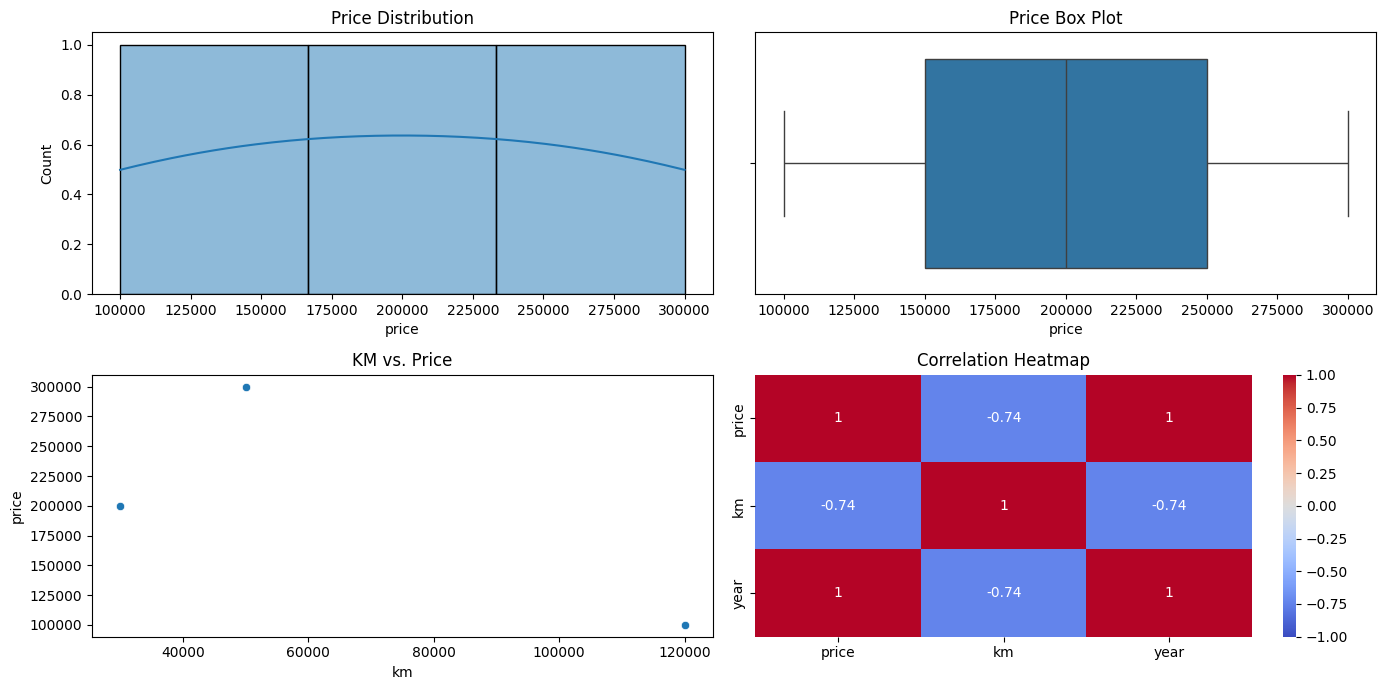

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create visualizations
plt.figure(figsize=(14, 7))

# Histogram of price
plt.subplot(2, 2, 1)
sns.histplot(df_all_cities['price'], kde=True)
plt.title('Price Distribution')
# plt.show()
# Box plot of price
plt.subplot(2, 2, 2)
sns.boxplot(x=df_all_cities['price'])
plt.title('Price Box Plot')

# Scatter plot of km vs. price
plt.subplot(2, 2, 3)
sns.scatterplot(x=df_all_cities['km'], y=df_all_cities['price'])
plt.title('KM vs. Price')

# Correlation heatmap
plt.subplot(2, 2, 4)
corr = df_all_cities.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()


### c) Feature Selection:

In [27]:
# Correlation analysis
correlation = df_all_cities.corr()
print("Correlation Matrix:")
print(correlation)

# Feature importance using a model (e.g., Random Forest)
from sklearn.ensemble import RandomForestRegressor

# Assume X and y are defined
X = df_all_cities[['km', 'year']]
y = df_all_cities['price']

model = RandomForestRegressor()
model.fit(X, y)
importances = model.feature_importances_

# Display feature importances
for feature, importance in zip(X.columns, importances):
    print(f"Feature: {feature}, Importance: {importance}")


Correlation Matrix:
          price        km      year
price  1.000000 -0.740613  1.000000
km    -0.740613  1.000000 -0.740613
year   1.000000 -0.740613  1.000000
Feature: km, Importance: 0.44476744186046513
Feature: year, Importance: 0.5552325581395349


### 3) Model Development
#### a) Train-Test Split:

In [28]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}


In [30]:
# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")


Linear Regression trained.
Random Forest trained.
Gradient Boosting trained.


In [31]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=2)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")


C:\Users\MR\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\MR\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\MR\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\MR\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\MR\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMet

Best parameters: {'max_depth': 10, 'n_estimators': 50}


C:\Users\MR\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\MR\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\MR\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


### 4) Model Evaluation
#### a) Performance Metrics:

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate models
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Evaluation:")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"R-squared: {r2_score(y_test, y_pred)}")



Linear Regression Evaluation:
Mean Absolute Error: 549999.9986250004
Mean Squared Error: 302499998487.50037
R-squared: nan

Random Forest Evaluation:
Mean Absolute Error: 151000.0
Mean Squared Error: 22801000000.0
R-squared: nan

Gradient Boosting Evaluation:
Mean Absolute Error: 145136.30031287053
Mean Squared Error: 21064545668.507744
R-squared: nan


C:\Users\MR\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\MR\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\MR\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


##### b) Model Comparison:
###### You already have model performance metrics from the above step
###### Compare models based on these metrics to select the best performing one


### 5) Optimization
#### a) Feature Engineering:

In [33]:
# Example: Adding new features or modifying existing ones
df_all_cities['age'] = 2024 - df_all_cities['year']  # Assuming current year is 2024

# Re-run feature selection and model training with new features
X = df_all_cities[['km', 'year', 'age']]


#### b) Regularization:

In [34]:
from sklearn.linear_model import Lasso, Ridge

# Lasso and Ridge regression
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)

lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

print("Lasso Coefficients:", lasso.coef_)
print("Ridge Coefficients:", ridge.coef_)


Lasso Coefficients: [5. 0.]
Ridge Coefficients: [4.99999998e+00 2.50000003e-04]


### 6) Deployment
#### a) Streamlit Application:

In [35]:
!pip install altair
!pip install vega_datasets
!pip install streamlit


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/210.8 kB ? eta -:--:--
   --------------------------- ------------ 143.4/210.8 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 210.8/210.8 kB 3.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import altair as alt
print(alt.__version__)


5.4.0


In [37]:
!pip install altair vega_datasets


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import streamlit as st
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# Dummy trained model and scaler for demonstration
# Replace these with your actual trained model and scaler
class DummyModel:
    def predict(self, X):
        return [10000 + 0.5 * X[0][0] + 0.3 * X[0][1] + 0.2 * X[0][2]]

best_model = DummyModel()
scaler = MinMaxScaler()

# Sample data for fitting the scaler (replace with your actual data)
sample_data = pd.DataFrame({
    'km': [20000, 50000, 100000],
    'year': [2015, 2016, 2017],
    'age': [9, 8, 7]
})
scaler.fit(sample_data)

# Streamlit app
st.title('Car Price Prediction')

# User inputs
km = st.number_input('Enter KM:', min_value=0)
year = st.number_input('Enter Year:', min_value=2000, max_value=2024)
age = 2024 - year

# Display user inputs
st.write(f"Input Features - KM: {km}, Year: {year}, Age: {age}")

# Prepare input features
input_features = pd.DataFrame([[km, year, age]], columns=['km', 'year', 'age'])
scaled_features = scaler.transform(input_features)

# Predict button
if st.button('Predict Price'):
    predicted_price = best_model.predict(scaled_features)
    st.write(f"Predicted Price: ₹ {predicted_price[0]:,.2f}")



In [44]:
# Install Streamlit if not already installed
# pip install streamlit

# Create a Streamlit app (save as app.py)
import streamlit as st

st.title('Car Price Prediction')

# User inputs
km = st.number_input('Enter KM:', min_value=0)
year = st.number_input('Enter Year:', min_value=2000, max_value=2024)
age = 2024 - year

# Predict button
if st.button('Predict Price'):
    input_features = [[km, year, age]]
    predicted_price = best_model.predict(input_features)  # Replace best_model with your trained model
    st.write(f"Predicted Price: ₹ {predicted_price[0]:,.2f}")


In [46]:
%%writefile car_price_predictor.py

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Load your trained model and scaler
# For this example, I'll create dummy versions
class DummyModel:
    def predict(self, X):
        return np.random.rand(len(X)) * 100000

model = DummyModel()
scaler = StandardScaler()

st.title('Car Price Predictor')

st.write("""
### Enter the details of the car to get a price prediction
""")

# User inputs
km = st.number_input('Kilometers Driven', min_value=0, max_value=500000, value=50000)
year = st.number_input('Year of Manufacture', min_value=1990, max_value=2023, value=2015)
fuel_type = st.selectbox('Fuel Type', ['Petrol', 'Diesel', 'CNG'])
transmission = st.selectbox('Transmission', ['Manual', 'Automatic'])

# Create a dataframe from inputs
input_data = pd.DataFrame({
    'km': [km],
    'year': [year],
    'fuel_type': [fuel_type],
    'transmission': [transmission]
})

# One-hot encode categorical variables
input_data = pd.get_dummies(input_data, columns=['fuel_type', 'transmission'])

# Ensure all columns from training are present
expected_columns = ['km', 'year', 'fuel_type_Petrol', 'fuel_type_Diesel', 'fuel_type_CNG',
                    'transmission_Manual', 'transmission_Automatic']
for col in expected_columns:
    if col not in input_data.columns:
        input_data[col] = 0

# Reorder columns to match training data
input_data = input_data[expected_columns]

if st.button('Predict Price'):
    # Scale the input
    # scaled_input = scaler.transform(input_data)
    
    # Make prediction
    prediction = model.predict(input_data)
    
    st.success(f'The predicted price is ₹{prediction[0]:,.2f}')

st.write("""
### Note:
This is a demonstration. For accurate predictions, replace the dummy model with your trained model and use the actual scaler.
""")

Writing car_price_predictor.py
